In [105]:
import pandas as pd
import numpy as np

In [106]:
train = pd.read_csv('/content/train.csv')
train

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [107]:
df = pd.DataFrame({'label':train.label, 'tweet':train.tweet})

In [108]:
from sklearn.model_selection import train_test_split
df, df_test = train_test_split(df, stratify = df['label'], test_size = 0.4, random_state = 12)

In [109]:
import fastai
from fastai import *
from fastai.text import * 
from functools import partial
import io
import os

In [110]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df, valid_df = df_test, path = "")

In [111]:
data_lm.show_batch

<bound method DataBunch.show_batch of TextLMDataBunch;

Train: LabelList (19177 items)
x: LMTextList
xxbos feel so proud of everything i have achieved in xxunk,xxbos best homeopathic remedies for # anxiety - # altwaystoheal # healing # peace ! !,xxbos [ xxunk ] [ xxunk ] murdered : soul suspect @user @user # xxunk # xxunk # xxunk,xxbos life is better when you 're laughing xxunk,xxbos ( daily express ) : xxunk sour # xxunk xxunk 's xxunk society yet again : bitter ..
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (12785 items)
x: LMTextList
xxbos @user i m crying i m so # xxunk,xxbos gon na give some white people a taste of ramadan today ð,xxbos @user oh . my . god,xxbos # beachbody bull up : you will dominate your bull and you will direct it whatever you want it to do . when yo,xxbos have n't been this happy in years ! # lovinglife # xxunk # xxunk ¦
y: LMLabelList
,,,,
Path: .;

Test: None>

In [112]:
data_lm.train_ds.vocab.itos[:30]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 '#',
 '@user',
 '!',
 '.',
 'the',
 'to',
 'i',
 'a',
 ',',
 '¦',
 'you',
 'and',
 'in',
 'for',
 'is',
 'of',
 'my',
 'it',
 '&',
 "'s",
 'love']

In [113]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.79E-02
Min loss divided by 10: 6.31E-02


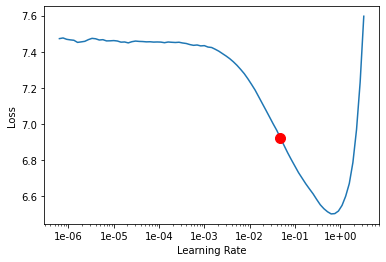

In [114]:
learn.lr_find()
learn.recorder.plot(suggestion = True)

In [115]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,5.246218,4.472030,0.278939,00:19


In [116]:
learn.freeze_to(-1)
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 3.98E-04
Min loss divided by 10: 8.32E-03


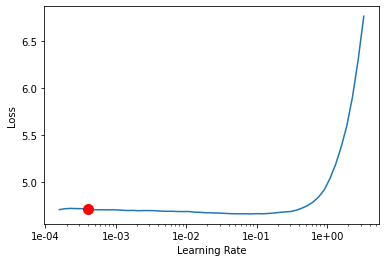

In [117]:
learn.recorder.plot(skip_start=40, suggestion=True)

In [118]:
learn.fit_one_cycle(3, slice(3e-3/(2.6**4), 1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,4.584476,4.198476,0.309846,00:19
1,4.240315,4.037895,0.326992,00:19
2,3.935008,4.011377,0.329444,00:19


In [119]:
learn.freeze_to(-2)
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.58E-04
Min loss divided by 10: 4.79E-05


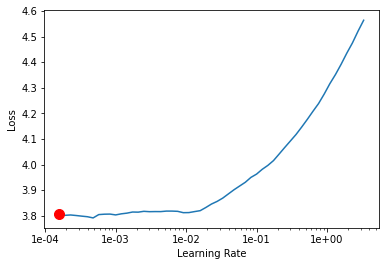

In [120]:
learn.recorder.plot(skip_start=40, suggestion=True)

In [121]:
learn.fit_one_cycle(3, slice(3e-3/(2.6**4), 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,3.804112,3.978369,0.333577,00:20
1,3.733629,3.943784,0.338558,00:20
2,3.665505,3.938845,0.339116,00:20


In [122]:
learn.save_encoder('my_encoder')

In [123]:
# Classifier model data
data_clas = TextClasDataBunch.from_df(path = "", train_df = df, valid_df = df_test, vocab=data_lm.train_ds.vocab, bs=32)

In [124]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, metrics=[accuracy, FBeta(beta=1)])
learn.load_encoder('my_encoder')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (19177 items)
x: TextList
xxbos feel so proud of everything i have achieved in xxunk,xxbos best homeopathic remedies for # anxiety - # altwaystoheal # healing # peace ! !,xxbos [ xxunk ] [ xxunk ] murdered : soul suspect @user @user # xxunk # xxunk # xxunk,xxbos life is better when you 're laughing xxunk,xxbos ( daily express ) : xxunk sour # xxunk xxunk 's xxunk society yet again : bitter ..
y: CategoryList
0,0,0,0,0
Path: .;

Valid: LabelList (12785 items)
x: TextList
xxbos @user i m crying i m so # xxunk,xxbos gon na give some white people a taste of ramadan today ð,xxbos @user oh . my . god,xxbos # beachbody bull up : you will dominate your bull and you will direct it whatever you want it to do . when yo,xxbos have n't been this happy in years ! # lovinglife # xxunk # xxunk ¦
y: CategoryList
0,0,0,0,0
Path: .;

Test: None, model=SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(11432, 

epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.20E-01
Min loss divided by 10: 5.25E-02


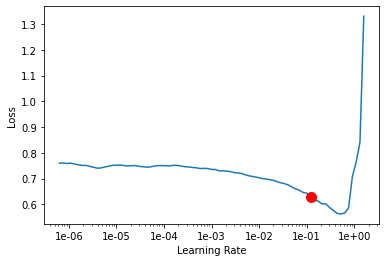

In [125]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [126]:
learn.fit_one_cycle(5, max_lr=5e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.190796,0.179028,0.940164,0.280339,00:14
1,0.188817,0.151367,0.946578,0.484528,00:14
2,0.190898,0.158329,0.944623,0.383275,00:14
3,0.173656,0.150438,0.947438,0.439065,00:14
4,0.156586,0.141962,0.949316,0.481600,00:14


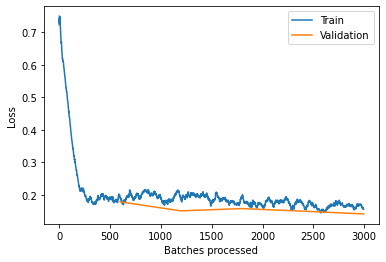

In [127]:
learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-06
Min loss divided by 10: 3.63E-06


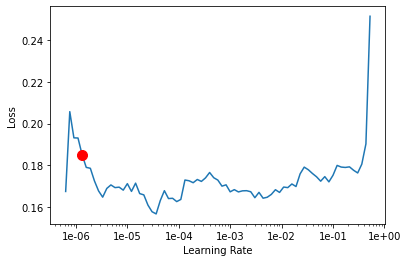

In [128]:
learn.freeze_to(-1)

learn.lr_find()
learn.recorder.plot(suggestion=True)

In [129]:
DatasetType.Test

<DatasetType.Test: 3>

In [130]:
preds, targets = learn.get_preds()
predictions = np.argmax(preds, axis = 1)


In [131]:
pd.crosstab(predictions, targets)

col_0,0,1
row_0,,
0,11836,596
1,52,301


In [132]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
cm=confusion_matrix(predictions,targets)
print(cm)
score = accuracy_score( predictions, targets)
print(score)

[[11836   596]
 [   52   301]]
0.9493156042236996
